In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd['PRICE'] = boston.target

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


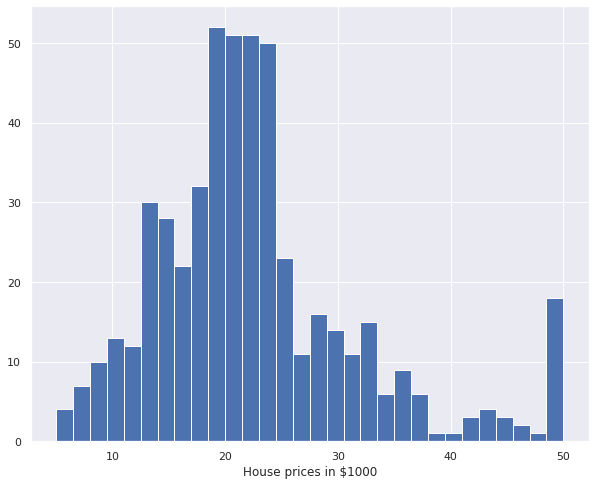

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 8)})
plt.hist(boston_pd['PRICE'], bins = 30)
plt.xlabel("House prices in $1000")
plt.show()

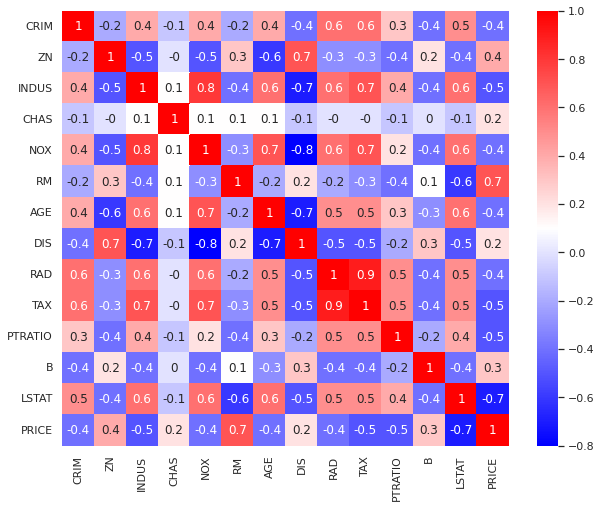

In [ ]:
correlation_matrix = boston_pd.corr().round(1)
sns.heatmap(data = correlation_matrix, annot = True, cmap='bwr')

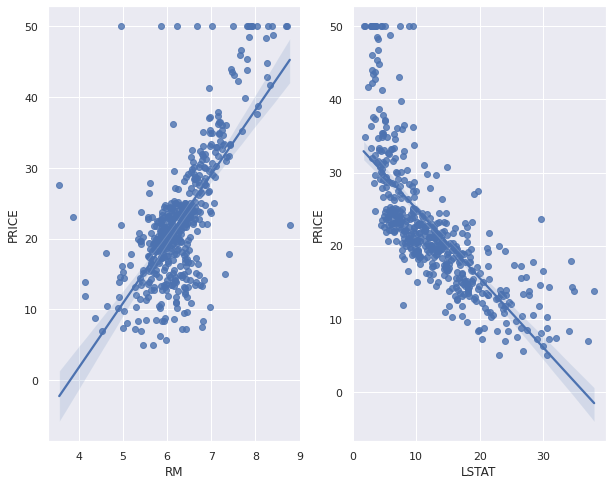

In [ ]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols = 2)
sns.regplot(x = 'RM', y = 'PRICE', data = boston_pd, ax = axs[0])
sns.regplot(x = 'LSTAT', y = 'PRICE', data = boston_pd, ax = axs[1])

In [ ]:
import numpy as np

X_rooms = boston_pd['RM']
y_price = boston_pd['PRICE']

print(np.array(X_rooms).shape)

(506,)


In [ ]:
X_rooms = np.array(X_rooms).reshape(-1, 1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_rooms, y_price,
                 test_size = 0.2,
                 random_state = 13)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 1)
(102, 1)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for training set
--------------------------------------
RMSE is  6.558400914980574


In [ ]:
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for training set
--------------------------------------
RMSE is  6.7881975443771765


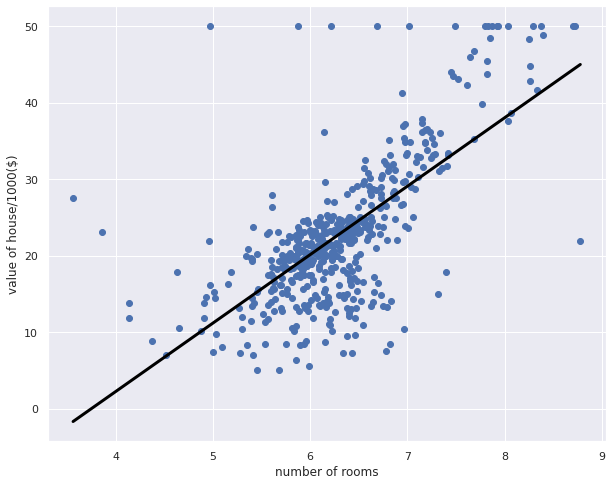

In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms))
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg.predict(prediction_space),
         color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

In [ ]:
X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2,
                 random_state = 13)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

In [ ]:
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

In [ ]:
y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices ($1000")
plt.title("Actual Prices vs Predicted prices")
plt.plot([0, 48], [0, 48], 'r')